In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
df=pd.read_excel("C:/Users/rrruiz/Downloads/96paises.xlsx",index_col=0,header=0)
df.head()
#df.describe()

,X 1,X 2,X 3,X 4,X 5,X 6,X 7,X 8,X 9,X 10,X 11
País,,,,,,,,,,,
"1, Albania",1.0,30,41,2199,3903,12,94,53,0.0,341,1.2
"2, Angola",3.0,124,46,4422,955,6,57,19,0.7,89,0.5
"3, Arabia Saudi",4.3,21,13,133540,91019,96,497,1,0.0,4566,13.1
"4, Argelia",2.5,34,24,44609,19883,42,180,2,0.8,906,3.0
"5, Argentina",1.3,22,31,278431,65962,160,1043,22,0.1,1504,3.5


In [5]:
df.columns

Index(['X 1', 'X 2', 'X 3', 'X 4', 'X 5', 'X 6', 'X 7', 'X 8', 'X 9', 'X 10',
       'X 11'],
      dtype='object')

In [9]:
df_new = df.loc[:,['X 1', 'X 2', 'X 3', 'X 4', 'X 5', 'X 6', 'X 7', 'X 8', 'X 9', 'X 10','X 11']]
#df_new.dtypes


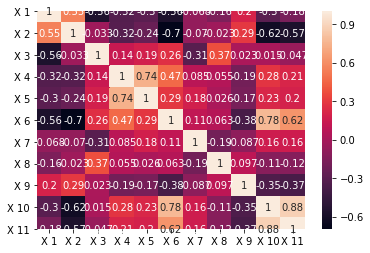

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_new.corr(), annot = True)
plt.show()


# fig, ax = plt.subplots()
# s=sns.heatmap(df_new.corr(),cmap='coolwarm') 
# s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
# s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
# ax.set_xlim(0,10)
# ax.set_ylim(0,10)
# plt.show()

In [17]:
escala=StandardScaler()# estandarizar las variables
escala.fit(df_new.corr())# calcula media y desviacion estandar
CuantiScale=escala.transform(df_new.corr())
print(CuantiScale)

[[ 2.33829543e+00  1.24445239e+00 -1.72964355e+00 -1.30222255e+00
  -1.30658187e+00 -1.42378616e+00 -4.77592274e-01 -7.64462499e-01
   5.09961267e-01 -9.52514075e-01 -7.11810966e-01]
 [ 1.34975097e+00  2.15271523e+00 -3.40127917e-01 -1.28632843e+00
  -1.15620602e+00 -1.67823593e+00 -4.83805540e-01 -3.51648352e-01
   7.54032004e-01 -1.57805849e+00 -1.53053971e+00]
 [-1.09060061e+00  6.49959314e-02  2.38961046e+00 -1.33187356e-01
  -9.56611251e-03  1.61770528e-01 -1.22380120e+00  8.63933845e-01
   4.43019054e-02 -3.25035197e-01 -4.41170368e-01]
 [-5.70487663e-01 -5.07046291e-01  1.25548883e-01  2.01802251e+00
   1.46273931e+00  5.53364285e-01 -7.95659828e-03 -1.10714169e-01
  -5.17590406e-01  2.06824006e-01  1.07801949e-01]
 [-5.15462708e-01 -3.54923550e-01  2.50995303e-01  1.37704010e+00
   2.14117129e+00  2.09776305e-01  2.83560735e-01 -2.00947675e-01
  -4.71031291e-01  9.23859594e-02  7.28031549e-02]
 [-1.10090839e+00 -1.27477273e+00  4.38173067e-01  6.75470951e-01
   2.45056524e-01  

In [22]:
#Creamos un objeto PCA y aplicamos
pca=PCA(n_components=10) # Otra opcion pca=PCA(.85)
pca.fit(CuantiScale)
cuanti_pca=pca.transform(CuantiScale) # convertimos nuestros datos con las nuevas dimensiones de PCA
print("Ajuste de PCA", CuantiScale.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

Ajuste de PCA (11, 11)
[5.72052502e-01 2.19727458e-01 9.15861181e-02 4.75937703e-02
 3.44103555e-02 2.66336777e-02 5.50323310e-03 1.39234479e-03
 9.15610421e-04 1.84930358e-04]
suma: 0.9653702036655893


In [23]:
pca.components_

array([[ 3.34989802e-01,  3.81601276e-01, -1.23066382e-01,
        -3.26114879e-01, -2.99823779e-01, -3.87615638e-01,
        -1.18318194e-01,  3.34975790e-02,  3.32584039e-01,
        -3.65313797e-01, -3.48336437e-01],
       [-2.80091274e-01, -2.12496924e-04,  5.69744647e-01,
         9.49942635e-02,  8.05952485e-02,  3.40154681e-02,
        -4.57662896e-01,  5.45824696e-01,  1.16786374e-01,
        -1.45085840e-01, -1.95433954e-01],
       [-4.49968631e-02,  1.66701787e-01, -2.70486684e-02,
         4.85682617e-01,  6.08637684e-01, -1.83381650e-01,
         3.03590850e-01, -1.25062367e-01,  7.14555129e-02,
        -3.12080177e-01, -3.45239011e-01],
       [-3.40168767e-01, -9.91038454e-02,  8.65639728e-02,
        -2.60047686e-01, -1.97710010e-01,  4.03037990e-02,
         7.67498961e-01,  3.61032205e-01,  1.49825800e-01,
        -6.53976526e-02, -1.11840695e-01],
       [ 3.10154055e-01,  4.41386531e-02, -3.70282355e-01,
         9.19343849e-02,  5.84683221e-02, -7.37854824e-02,
  

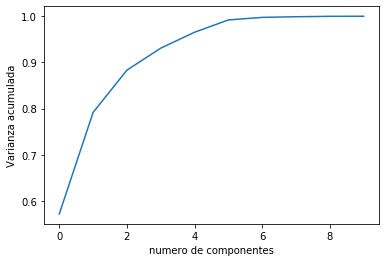

In [24]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('numero de componentes')
plt.ylabel('Varianza acumulada')
plt.show()

In [ ]:
#Apartir del segundo componente podemos tener un 90% de la varianza.

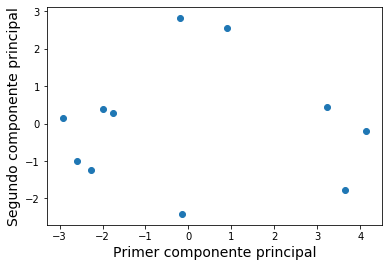

In [26]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=cuanti_pca[:,0]
Yax=cuanti_pca[:,1]
plt.scatter(Xax, Yax) 
plt.xlabel("Primer componente principal",fontsize=14)
plt.ylabel("Segundo componente principal",fontsize=14)
plt.show()